In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Exploratory Data Analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df_login = pd.read_json(r'C:\Users\ashle\Documents\Springboard\Take Home Challenge\logins.json')
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df_login.shape

(93142, 1)

In [4]:
df_login['denote']=1

In [5]:
df_login

,login_time,denote
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


In [6]:
# check the data type of each columns 
df_login.dtypes

login_time    datetime64[ns]
denote                 int64
dtype: object

In [7]:
#  Aggregate these login counts based on 15minute time intervals
login_seq = df_login.resample('15T',on='login_time').denote.sum().sort_values(ascending=False)
login_seq.head(30)

login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 04:45:00    59
1970-04-04 05:15:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-04-04 00:30:00    53
1970-03-17 01:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
1970-03-28 04:30:00    50
1970-02-15 04:45:00    50
1970-04-03 22:45:00    50
1970-03-29 02:15:00    50
1970-04-04 00:45:00    50
1970-03-01 04:45:00    48
1970-04-03 23:15:00    47
1970-03-08 05:00:00    47
1970-04-04 03:00:00    47
1970-03-07 03:00:00    47
1970-03-22 01:30:00    46
1970-02-08 03:15:00    46
1970-02-07 04:30:00    46
1970-03-07 04:45:00    46
1970-03-22 04:00:00    46
Name: denote, dtype: int64

#### Finding: From above result, we understand that the most frequent login 15 mins could reach to 73
    


<AxesSubplot:xlabel='login_time'>

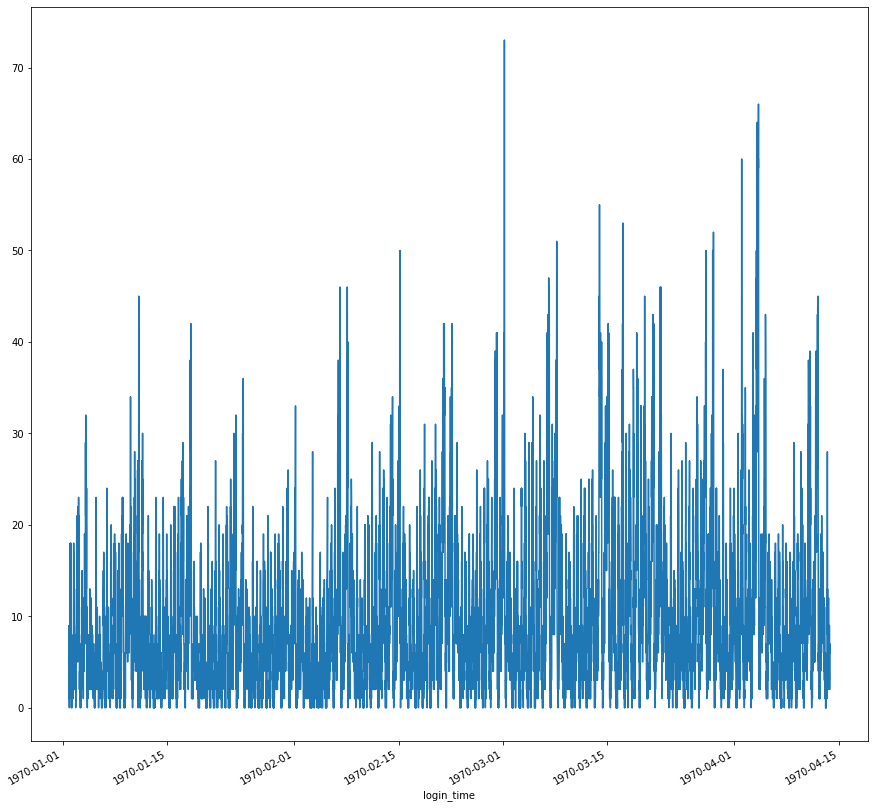

In [8]:
login_seq.plot(figsize=(15,15))

In [9]:
df_login['hour'] = df_login['login_time'].dt.hour

<AxesSubplot:xlabel='hour', ylabel='denote'>

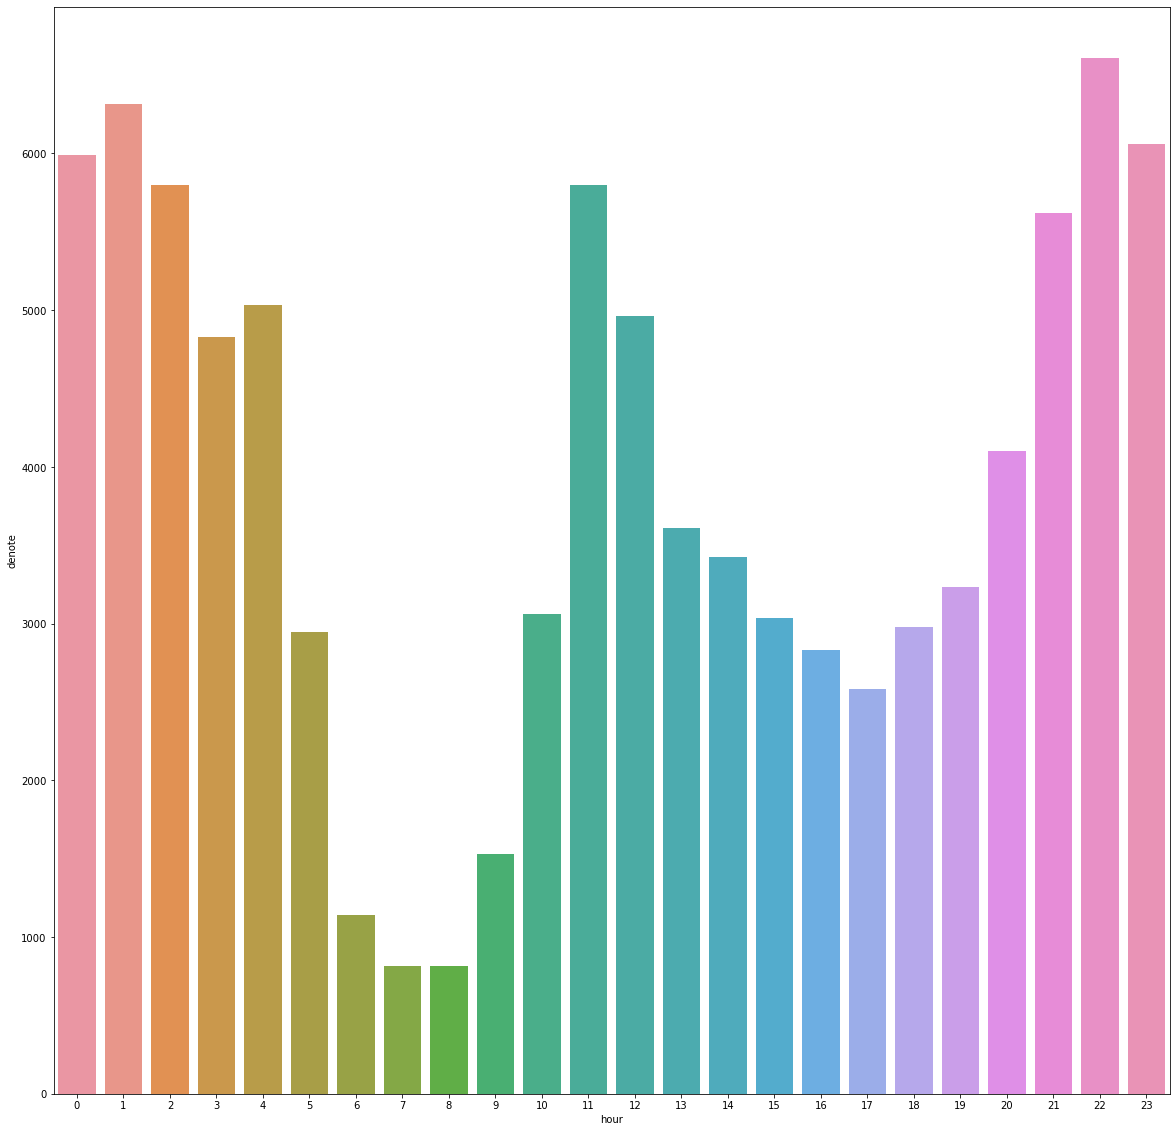

In [10]:
# group by the login hours of a day
df_hour = df_login[['denote', 'hour']]
df_hour = df_hour.groupby('hour').sum().reset_index()

#barplot of logins by hour 
plt.figure(figsize=(20,20))
sns.barplot(x='hour', y='denote', data=df_hour)

#### Finding: There are two peaks within a day. One is around midnight and another peak is at 11am， therefore, there are two busy periods for the company in one day.

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. 

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.


What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

A: Rider retention.  By encouraging rides across bridges, this should increase the amount of rides per driver, the distance of travel, and the number of repeat riders.  By measuring the rider retnetion, it should indicate if the change in policy makes more driver availability and improve the experience for riders to attract more revenue.

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

Conduct the A/B test for two groups for the drivers. One group of drivers would receive benefits of reimbursing all toll costs. Another group would not receive the benefits.

Hypothesis
Null hypothesis: There is no difference about rider retention between two groups
Alternate hypothesis: There is an increase in rider retention for the group that receives toll benefits

b. what statistical test(s) you will conduct to verify the significance of the observation Answer: T-test / Z-test

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

If the ride frequency per driver has been increased, then it is worthwhile to apply reimbursement policy between two cities travelling.

## Part 3 ‑ Experiment and metrics design

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

Users Sample dataset
It is a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

Data description

city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form ‘YYYY MM DD’
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday

### Import the data set

In [11]:
df = pd.read_json(r'C:\Users\ashle\Documents\Springboard\Take Home Challenge\ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [12]:
# drop the rows with missing value
df = df.dropna(axis=0)

# create dummy variables
city_columns = pd.get_dummies(df['city'],prefix='city')
df = pd.concat([df,city_columns], axis=1)
df= df.drop('city',axis=1)

phone_columns = pd.get_dummies(df['phone'],prefix='phone')
df = pd.concat([df, phone_columns], axis=1)
df = df.drop('phone',axis =1)

df['ultimate_black_user'] = [1 if x[1]==True else 0 for x in df['ultimate_black_user'].iteritems()]
df['ultimate_black_user'].value_counts()

0    25526
1    15919
Name: ultimate_black_user, dtype: int64

In [13]:
# check the data type of 'signup_date' and understand it is string format in the dataset 
df['signup_date'].dtypes

dtype('O')

In [14]:
# Convert signup_date column to be an integer of seconds since the first user signed up 
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['signup_date'] = (df['signup_date'] - min(df['signup_date'])).dt.total_seconds()

# Get the lastest date of the 'last_trip_date'. 
df['last_trip_date'].max()

'2014-07-01'

In [15]:
# make retained column
# Rider is retained if they have ridden in the last month, which means they should drive at least one time after '2014-06-01'

df['retained'] = np.where(df['last_trip_date']>='2014-06-01', 1,0)

df['retained'].value_counts()

0    24410
1    17035
Name: retained, dtype: int64

### Model the data set

In [16]:
import matplotlib.pyplot as plt 
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics 
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [17]:
# Define the predicted variables and target varible
X = df.drop(['last_trip_date','retained'], axis=1)
y = df[['retained']]

# Split data into testing dataset and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

X_test.shape, y_test.shape

((12434, 14), (12434, 1))

#### Logistic Regression

In [18]:
# Define an empty dictionary to store all the model 
model_list = {}

# Fit the model to the training set
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.01,0.05,0.1,1]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'),param_grid, cv=3,scoring='roc_auc')
grid.fit(X_train, y_train)
print(grid.best_params_)
logit_model = LogisticRegression(**grid.best_params_)
logit_model.fit(X_train, y_train)
model_list['logit_model'] = logit_model

{'C': 0.01}


#### Random Forest Model

In [19]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [2,4,6,8], "n_estimators": [100,200,300,500]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 3, scoring = "roc_auc")
grid.fit(X_train, y_train)
print(grid.best_params_)
rf_model = RandomForestClassifier(**grid.best_params_)
rf_model.fit(X_train, y_train)
model_list['rf_model'] = rf_model

{'max_depth': 8, 'n_estimators': 300}


#### XG Boost

In [20]:
!pip install xgboost

In [21]:
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
para_grid = {"learning_rate":[0.01, 0.1,0.5],"n_estimators":[100,300,500], 'max_depth':[3,4,5]}
grid = GridSearchCV(XGBClassifier(),param_grid, cv=3, scoring="roc_auc")
grid.fit(X_train, y_train)
print("best parameters  through grid search:", grid.best_params_)
xgb_model = XGBClassifier(**grid.best_params_)
xgb_model.fit(X_train,y_train)
model_list['xgb_model'] = xgb_model

[17:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Support Vector Machines

In [22]:
from sklearn import preprocessing 

#normalized the data attributes
normalized_X = preprocessing.normalize(X)

normalized_X.shape

(41445, 14)

In [23]:
X_train_nor, X_test_nor, y_train, y_test = train_test_split(normalized_X, y, test_size=0.3, random_state= 42)
X_train_nor.shape, y_train.shape

((29011, 14), (29011, 1))

In [24]:
%%time
from sklearn import svm
from sklearn.svm import SVC
param_grid = {'C':[0.1,1,10],'gamma':[1,0.1,0.01]}
grid = GridSearchCV(SVC(probability=True), param_grid, cv =3,refit=True, verbose=2)
grid.fit(X_train_nor,y_train)
print("best hypterparameters through grid search:",grid.best_params_)
svm_model = SVC(**grid.best_params_,probability=True)
svm_model.fit(X_train_nor, y_train)
model_list['svm_model'] = svm_model

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .....................................C=0.1, gamma=1; total time= 2.1min
[CV] END .....................................C=0.1, gamma=1; total time= 2.1min
[CV] END .....................................C=0.1, gamma=1; total time= 2.8min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.6min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.2min
[CV] END ...................................C=0.1, gamma=0.1; total time= 2.4min
[CV] END ..................................C=0.1, gamma=0.01; total time= 2.2min
[CV] END ..................................C=0.1, gamma=0.01; total time= 2.0min
[CV] END ..................................C=0.1, gamma=0.01; total time= 2.1min
[CV] END .......................................C=1, gamma=1; total time= 2.2min
[CV] END .......................................C=1, gamma=1; total time= 2.3min
[CV] END .......................................C

#### Model Comparison

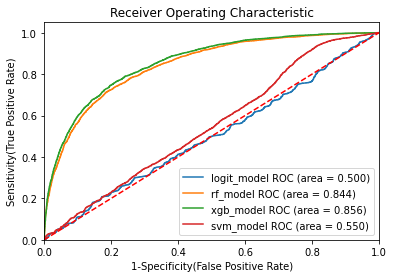

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()

# Below for loop iterates through your models list
for name, model in model_list.items():
    if name == 'svm_model':
        a = X_test_nor
        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
        
    else: 
        a = X_test
# Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(a)[:,1])
# Calculate Area under the curve to display on the plot
        auc = metrics.roc_auc_score(y_test,model.predict_proba(a)[:,1])
# Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

XG Boost performs best with the largest ROC area.

In [26]:
auc = pd.DataFrame()
for name, model in model_list.items():
    if name == 'svm_model':
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train_nor)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_nor)[:,1])  
    else:
        train_auc = metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1])
        test_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    auc.at[name, "train_auc"] = '{0:.2f}'.format(train_auc)
    auc.at[name, "test_auc"] = '{0:.2f}'.format(test_auc)

auc

,train_auc,test_auc
logit_model,0.51,0.50
rf_model,0.86,0.84
xgb_model,0.87,0.86
svm_model,0.55,0.55


There appears to be no significant overfitting in any of the models.

In [27]:
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

for name, model in model_list.items():
    if name == 'svm_model':
        clf = model.fit(X_train_nor, y_train)
        y_pred = clf.predict(X_test_nor)
        print(name)
        print(classification_report(y_test, y_pred))
    else:
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))

logit_model
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      7293
           1       0.00      0.00      0.00      5141

    accuracy                           0.59     12434
   macro avg       0.29      0.50      0.37     12434
weighted avg       0.34      0.59      0.43     12434

rf_model
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      7293
           1       0.75      0.67      0.71      5141

    accuracy                           0.77     12434
   macro avg       0.77      0.76      0.76     12434
weighted avg       0.77      0.77      0.77     12434

[19:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb_model
     

### Feature Importance

#### Random Forest and XGBoost

In [28]:
def feature(name, model, X_train):
    series = pd.Series(model.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns))
    series.sort_values(ascending=False)[:25].plot(kind='bar',figsize=(10,10))
    plt.xticks(rotation = 60,ha = 'right')
    plt.title("Feature Importance of "+name, fontsize=15)
    plt.show()

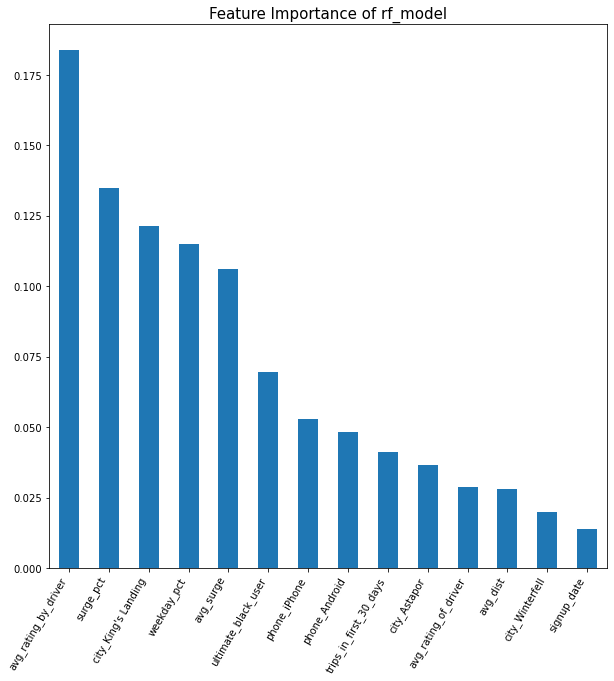

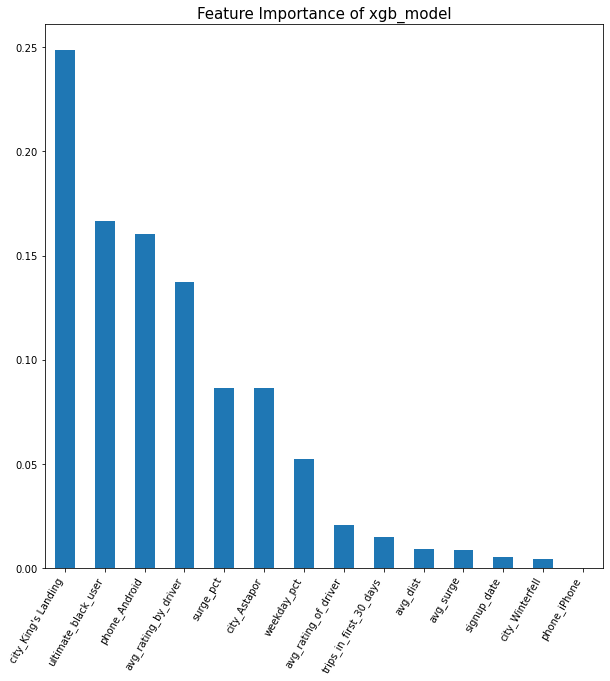

In [29]:
for name, model in model_list.items():
    if name == 'xgb_model' or name =='rf_model':
        feature(name, model, X_train)

For random forest model, 'avg_rating_by_driver','surge_pct' and 'city_King's Landing' are the top three most important variables in the model

For XGBoost model, 'city_King's Landing','ultimate_black_user','phone_Android' are the top three most important variables in the model.

#### Logistic Regression

In [30]:
from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return coefs, p

coefs, p = logit_pvalue(logit_model, X_train)
X_cols_inc = X.columns.tolist()
X_cols_inc.insert(0,'Intercept')
p_value = pd.DataFrame({'feature':X_cols_inc, 'coeffienct':coefs, 'P_value':p.round(6)})
p_value

,feature,coeffienct,P_value
0,Intercept,-2.783521e-13,NaN
1,trips_in_first_30_days,3.016037e-12,1.0
2,signup_date,-2.219153e-07,0.0
3,avg_rating_of_driver,-1.307499e-12,1.0
4,avg_surge,-3.048258e-13,1.0
5,surge_pct,-1.406564e-12,1.0
6,ultimate_black_user,3.615145e-13,1.0
7,weekday_pct,-1.614559e-11,1.0
8,avg_dist,-3.673356e-12,1.0
9,avg_rating_by_driver,-1.386631e-12,1.0


In [31]:
p_value.sort_values(by=['P_value'])

,feature,coeffienct,P_value
2,signup_date,-2.219153e-07,0.0
1,trips_in_first_30_days,3.016037e-12,1.0
3,avg_rating_of_driver,-1.307499e-12,1.0
4,avg_surge,-3.048258e-13,1.0
5,surge_pct,-1.406564e-12,1.0
6,ultimate_black_user,3.615145e-13,1.0
7,weekday_pct,-1.614559e-11,1.0
8,avg_dist,-3.673356e-12,1.0
9,avg_rating_by_driver,-1.386631e-12,1.0
0,Intercept,-2.783521e-13,NaN
